In [7]:
import pandas as pd
import numpy as np
import yfinance as yf
import matplotlib.pyplot as plt
import seaborn as sns
n=int(input('Enter the number of stocks you want: '))
start_date=input('Enter the start date in the format(YYYY-MM-DD): ')
end_date=input('Enter the end date in the format(YYYY-MM-DD): ')
tickers=[]
for i in range(n):
  ticker=input(f'Enter the ticker of the stock {i+1}: ').upper().strip()
  tickers.append(ticker)
print('The list of stocks that you provided are:')
for i,ticker in enumerate(tickers, start=1):
  print(f'{i}. {ticker}')
df=yf.download(tickers,start=start_date,end=end_date,auto_adjust=False)['Adj Close'].dropna()
returns=df.pct_change().dropna()

Enter the number of stocks you want: 3
Enter the start date in the format(YYYY-MM-DD): 2024-01-01
Enter the end date in the format(YYYY-MM-DD): 2025-06-01
Enter the ticker of the stock 1: amzn
Enter the ticker of the stock 2: tsla
Enter the ticker of the stock 3: aapl


[                       0%                       ]

The list of stocks that you provided are:
1. AMZN
2. TSLA
3. AAPL


[*********************100%***********************]  3 of 3 completed


In [ ]:
#Summary Statistics
from scipy.stats import skew, kurtosis
mean_returns=np.mean(returns)
std_returns=np.std(returns)
skew_returns=skew(returns)
kurtosis_returns=kurtosis(returns)
print('Mean Returns:')
print(mean_returns)
print('Standard Deviation of Returns:')
print(std_returns)
print('Skewness of Returns:')
print(skew_returns)
print('Kurtosis of Returns:')
print(kurtosis_returns)

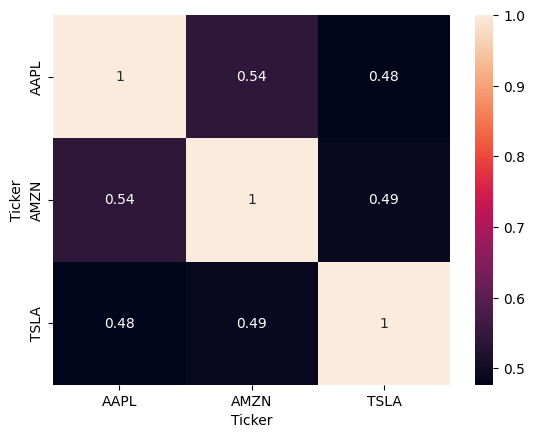

Portfolio Cumulative Return:
0.3561945365433159
Portfolio Daily Standard Deviation:
0.022746209590455473
Annual Sharpe Ratio:
0.6702376352695689


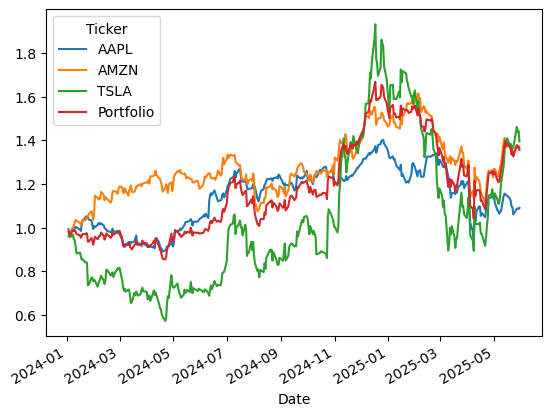

In [16]:
#Correlation, Equi-weight Portfolio return and Visualization
returns_corr=returns.corr()
sns.heatmap(returns_corr,annot=True)
plt.show()
weights_stocks=1/n
portfolio_daily_returns=np.sum(returns*weights_stocks,axis=1)
portfolio_cumulative_return=((1+portfolio_daily_returns).prod())-1
portfolio_daily_std=np.std(portfolio_daily_returns)
print('Portfolio Cumulative Return:')
print(portfolio_cumulative_return)
print('Portfolio Daily Standard Deviation:')
print(portfolio_daily_std)
annual_sharpe_ratio=((portfolio_daily_returns.mean()*252)-0.04)/(portfolio_daily_std*(np.sqrt(252)))
print('Annual Sharpe Ratio:')
print(annual_sharpe_ratio)
cumulative_growth=(1+returns).cumprod()
portfolio_cumulative_growth=(1+portfolio_daily_returns).cumprod()
combined=cumulative_growth.copy()
combined['Portfolio']=portfolio_cumulative_growth
combined.plot()
plt.show()